In [160]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [161]:
df = pd.read_excel('/content/listings_Excel_Python_Modelagem.xlsx') # Optado por seguir com a análise apenas com os bairros de Ipanema e Barra da Tijuca,
#devido uma maior correlação das metricas Acomodações, Banheiros e Quartos com Aluguel.

In [162]:
df.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price
0,Ipanema,2,1.0,1.0,100
1,Ipanema,2,1.0,1.0,624
2,Ipanema,5,3.0,3.0,1899
3,Barra da Tijuca,4,2.0,2.0,539
4,Ipanema,13,15.0,6.0,2270


In [163]:
df.describe()

,accommodates,bathrooms,bedrooms,price
count,5971.000000,5963.000000,5798.000000,5971.000000
mean,4.286217,1.742747,1.825630,1088.203316
std,2.311063,1.127659,1.022155,5182.175147
min,1.000000,0.000000,1.000000,53.000000
25%,3.000000,1.000000,1.000000,314.000000
50%,4.000000,1.000000,2.000000,495.000000
75%,5.000000,2.000000,2.000000,896.000000
max,16.000000,15.000000,11.000000,281729.000000


In [164]:
df.corr()

<ipython-input-164-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,accommodates,bathrooms,bedrooms,price
accommodates,1.000000,0.693223,0.810084,0.131711
bathrooms,0.693223,1.000000,0.790771,0.146105
bedrooms,0.810084,0.790771,1.000000,0.127809
price,0.131711,0.146105,0.127809,1.000000


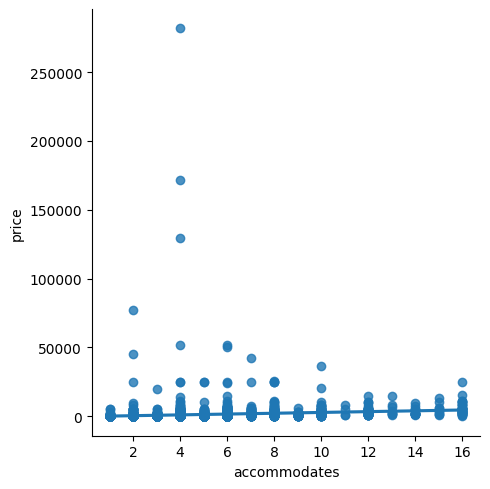

In [165]:
sns.lmplot(x='accommodates', y='price', palette='Set2', data= df) # a reta no gráfico ficou quase na horizontal, o que signifca que aumentar Acomodações
# não necessariamente aumentará o Aluguel. Serão desconsiderados os Outliers com aluguel acima de 10.000, e Acomodações nulos ou vazios.

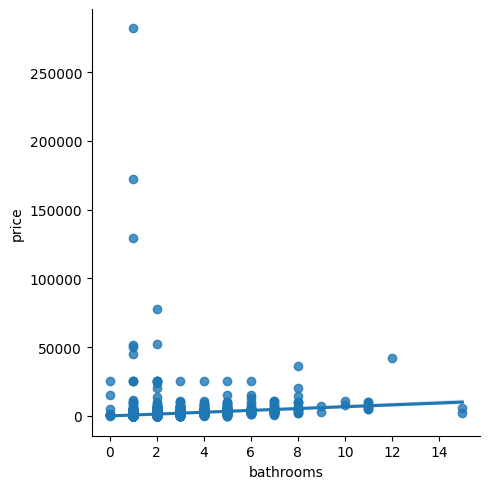

In [166]:
sns.lmplot(x='bathrooms', y='price', palette='Set2', data= df) # a reta no gráfico ficou quase na horizontal, o que signifca que aumentar Banheiros
# não necessariamente aumentará o Aluguel. Serão desconsiderados os Outliers com aluguel acima de 10.000, e Banheiros nulos ou vazios.

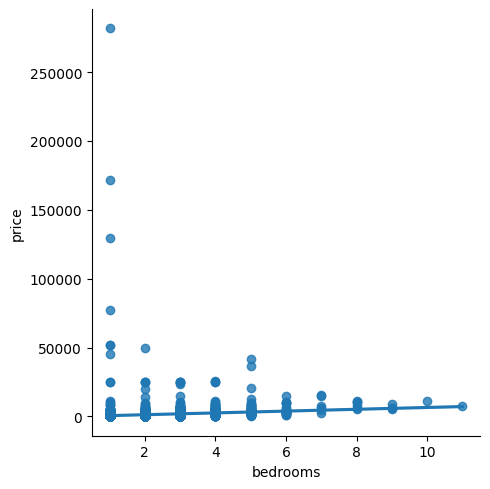

In [167]:
sns.lmplot(x='bedrooms', y='price', palette='Set2', data= df) # a reta no gráfico ficou quase na horizontal, o que signifca que aumentar Quartos
# não necessariamente aumentará o Aluguel. Serão desconsiderados os Outliers com aluguel acima de 10.000, e Quartos nulos ou vazios.

In [168]:
df2 = pd.read_excel('/content/listings_Excel_Python_Modelagem_Sem_Outliers.xlsx')

In [169]:
df2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price
0,Ipanema,2,1,1,100
1,Ipanema,2,1,1,624
2,Ipanema,5,3,3,1899
3,Barra da Tijuca,4,2,2,539
4,Ipanema,13,15,6,2270


In [170]:
df2.describe()

,accommodates,bathrooms,bedrooms,price
count,5741.000000,5741.000000,5741.000000,5741.000000
mean,4.303606,1.751263,1.814841,852.622714
std,2.272461,1.089769,0.996000,1101.445752
min,1.000000,1.000000,1.000000,53.000000
25%,3.000000,1.000000,1.000000,319.000000
50%,4.000000,1.000000,2.000000,500.000000
75%,6.000000,2.000000,2.000000,896.000000
max,16.000000,15.000000,11.000000,10000.000000


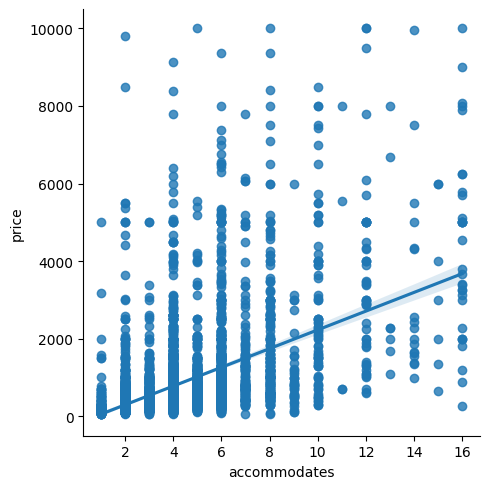

In [171]:
sns.lmplot(x='accommodates', y='price', palette='Set2', data= df2) # nota-se que nos bairros de Ipanema e Barra da Tijuca quanto maior a quantidade de Acomodações, maior é o Aluguel dos Imóveis.

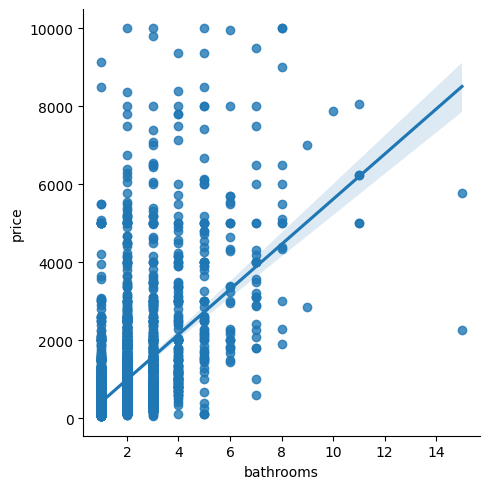

In [172]:
sns.lmplot(x='bathrooms', y='price', palette='Set2', data= df2) # nota-se que nos bairros de Ipanema e Barra da Tijuca quanto maior a quantidade de Banheiros, maior é o Aluguel dos Imóveis.

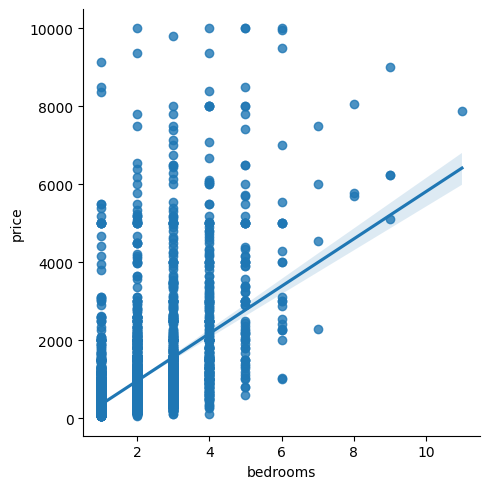

In [173]:
sns.lmplot(x='bedrooms', y='price', palette='Set2', data= df2) # nota-se que nos bairros de Ipanema e Barra da Tijuca quanto maior a quantidade de Quartos, maior é o Aluguel dos Imóveis.

In [174]:
y_accommodates = df2['price']
y_accommodates.head()

0     100
1     624
2    1899
3     539
4    2270
Name: price, dtype: int64

In [175]:
x_accommodates = df2[['accommodates']]
x_accommodates = sm.add_constant(x_accommodates)
x_accommodates.head()

,const,accommodates
0,1.0,2
1,1.0,2
2,1.0,5
3,1.0,4
4,1.0,13


In [176]:
modelo_accommodates = sm.OLS(y_accommodates,x_accommodates)
modelo_accommodates

In [177]:
ajuste_accommodates = modelo_accommodates.fit()
ajuste_accommodates

In [178]:
ajuste_accommodates.summary() # r ao quadrado de Acomodações é de 0.248, ou seja, acomodações representa 25% do valor do Aluguel
# E a cada 1(uma) Acomodação adicionada ao Imóvel, o Aluguel aumenta em 241.22.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1890.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:54:14   Log-Likelihood:                -47541.
No. Observations:                5741   AIC:                         9.509e+04
Df Residuals:                    5739   BIC:                         9.510e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -185.5263     27.007     -6.870      0.000    -238.470    -132.583
accommodates   241.2277      5.549     43.469      0.000     230.349     252.107
==============================================================================
Omnibus:                     4508.356   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109234.838
Skew:                           3.629   Prob(JB):                         0.00
Kurtosis:                      23.099   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
y_bathrooms = df2['price']
y_bathrooms.head()

0     100
1     624
2    1899
3     539
4    2270
Name: price, dtype: int64

In [180]:
x_bathrooms = df2[['bathrooms']]
x_bathrooms = sm.add_constant(x_bathrooms)
x_bathrooms.head()

,const,bathrooms
0,1.0,1
1,1.0,1
2,1.0,3
3,1.0,2
4,1.0,15


In [181]:
modelo_bathrooms = sm.OLS(y_bathrooms,x_bathrooms)
modelo_bathrooms

In [182]:
ajuste_bathrooms = modelo_bathrooms.fit()
ajuste_bathrooms

In [183]:
ajuste_bathrooms.summary() # r ao quadrado de Banheiros é de 0.327, ou seja, acomodações representa 33% do valor do Aluguel
# E a cada 1(um) Banheiro adicionad ao Imóvel, o Aluguel aumenta em 578.04.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     2790.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:54:14   Log-Likelihood:                -47221.
No. Observations:                5741   AIC:                         9.445e+04
Df Residuals:                    5739   BIC:                         9.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.6766     22.574     -7.074      0.000    -203.930    -115.423
bathrooms    578.0396     10.944     52.816      0.000     556.584     599.495
==============================================================================
Omnibus:                     4504.221   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122479.785
Skew:                           3.574   Prob(JB):                         0.00
Kurtosis:                      24.469   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
y_bedrooms = df2['price']
y_bedrooms.head()

0     100
1     624
2    1899
3     539
4    2270
Name: price, dtype: int64

In [185]:
x_bedrooms = df2[['bedrooms']]
x_bedrooms = sm.add_constant(x_bedrooms)
x_bedrooms.head()

,const,bedrooms
0,1.0,1
1,1.0,1
2,1.0,3
3,1.0,2
4,1.0,6


In [186]:
modelo_bedrooms = sm.OLS(y_bedrooms,x_bedrooms)
modelo_bedrooms

In [187]:
ajuste_bedrooms = modelo_bedrooms.fit()
ajuste_bedrooms

In [188]:
ajuste_bedrooms.summary() # r ao quadrado de Quartos é de 0.300, ou seja, acomodações representa 30% do valor do Aluguel
# E a cada 1(um) Quarto adicionad ao Imóvel, o Aluguel aumenta em 606.00.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     2463.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:54:14   Log-Likelihood:                -47333.
No. Observations:                5741   AIC:                         9.467e+04
Df Residuals:                    5739   BIC:                         9.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -247.1722     25.278     -9.778      0.000    -296.727    -197.617
bedrooms     606.0008     12.211     49.628      0.000     582.063     629.939
==============================================================================
Omnibus:                     4570.269   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119482.237
Skew:                           3.674   Prob(JB):                         0.00
Kurtosis:                      24.107   Cond. No.                         5.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
y = df2['price']
y.head()

0     100
1     624
2    1899
3     539
4    2270
Name: price, dtype: int64

In [190]:
x = df2[['accommodates', 'bathrooms', 'bedrooms']]
x = sm.add_constant(x)
x.head()

,const,accommodates,bathrooms,bedrooms
0,1.0,2,1,1
1,1.0,2,1,1
2,1.0,5,3,3
3,1.0,4,2,2
4,1.0,13,15,6


In [191]:
modelo = sm.OLS(y,x)
modelo

In [192]:
ajuste = modelo.fit()
ajuste

In [193]:
ajuste.summary() # r ao quadrado de Acomodações, Banheirtos e Quartos é de 0.356, ou seja, essa combinação representa 36% do valor do Aluguel.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:54:15   Log-Likelihood:                -47095.
No. Observations:                5741   AIC:                         9.420e+04
Df Residuals:                    5737   BIC:                         9.422e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -363.6408     25.750    -14.122      0.000    -414.121    -313.161
accommodates    50.2578      8.743      5.748      0.000      33.117      67.398
bathrooms      357.5118     17.574     20.343      0.000     323.060     391.964
bedrooms       206.0108     23.383      8.810      0.000     160.170     251.851
==============================================================================
Omnibus:                     4608.772   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130111.788
Skew:                           3.689   Prob(JB):                         0.00
Kurtosis:                      25.125   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
df2['previsao'] = modelo.predict(ajuste.params)
df2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,previsao
0,Ipanema,2,1,1,100,300.397348
1,Ipanema,2,1,1,624,300.397348
2,Ipanema,5,3,3,1899,1578.215848
3,Barra da Tijuca,4,2,2,539,964.435478
4,Ipanema,13,15,6,2270,6888.452292


In [197]:
df2['erro_previsao'] = df2.price - df2.previsao
df2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,previsao,erro_previsao
0,Ipanema,2,1,1,100,300.397348,-200.397348
1,Ipanema,2,1,1,624,300.397348,323.602652
2,Ipanema,5,3,3,1899,1578.215848,320.784152
3,Barra da Tijuca,4,2,2,539,964.435478,-425.435478
4,Ipanema,13,15,6,2270,6888.452292,-4618.452292


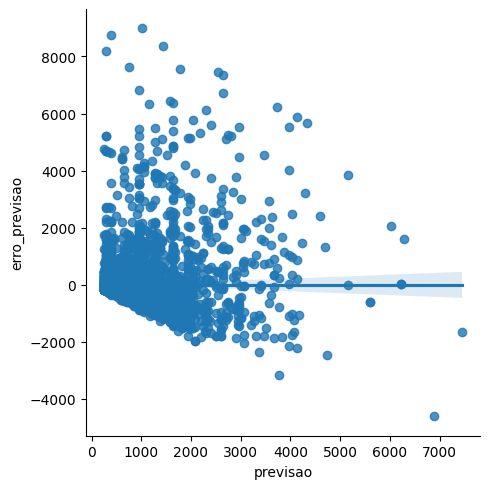

In [198]:
sns.lmplot(x='previsao' , y='erro_previsao', palette ="Set2", data= df2)

In [199]:
df2['erro_previsao'].mean() # Erro com média zero, para os incrementos de Acomodações, Banheiros e Quartos, nos Bairros de Ipanema e Barra da Tijuca.

8.16438232896179e-12